/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[undouble] >INFO> [177] Images are collected from path <DATA/>
[undouble] >INFO> [177] Read and check..
[undouble] >INFO> Preprocessing images..
100%|██████████| 177/177 [00:00<00:00, 9627.95it/s]
[undouble] >INFO> Compute adjacency matrix [177x177] with absolute differences based on the image-hash of [phash].
100%|██████████| 177/177 [00:00<00:00, 81420.47it/s]
[undouble] >INFO> [8] groups with similar image-hash.
[undouble] >INFO> [8] groups are detected for [17] images.
0it [00:00, ?it/s]

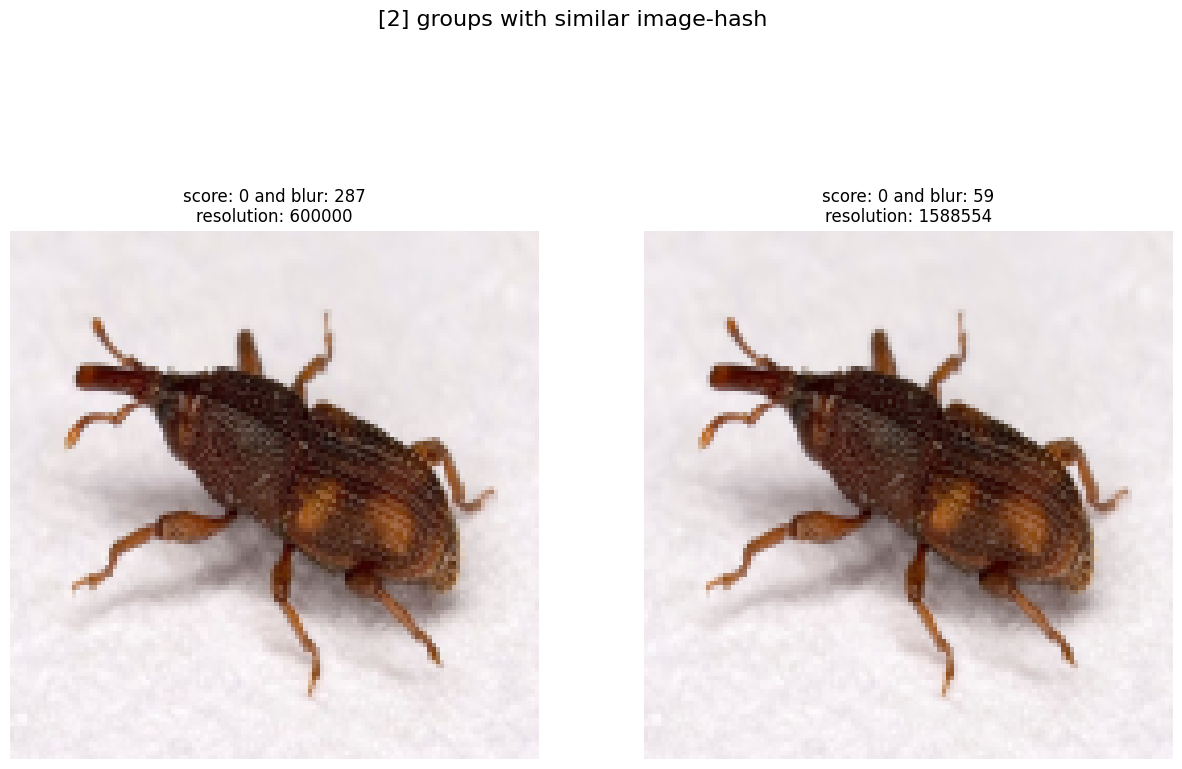

1it [00:00,  2.83it/s]

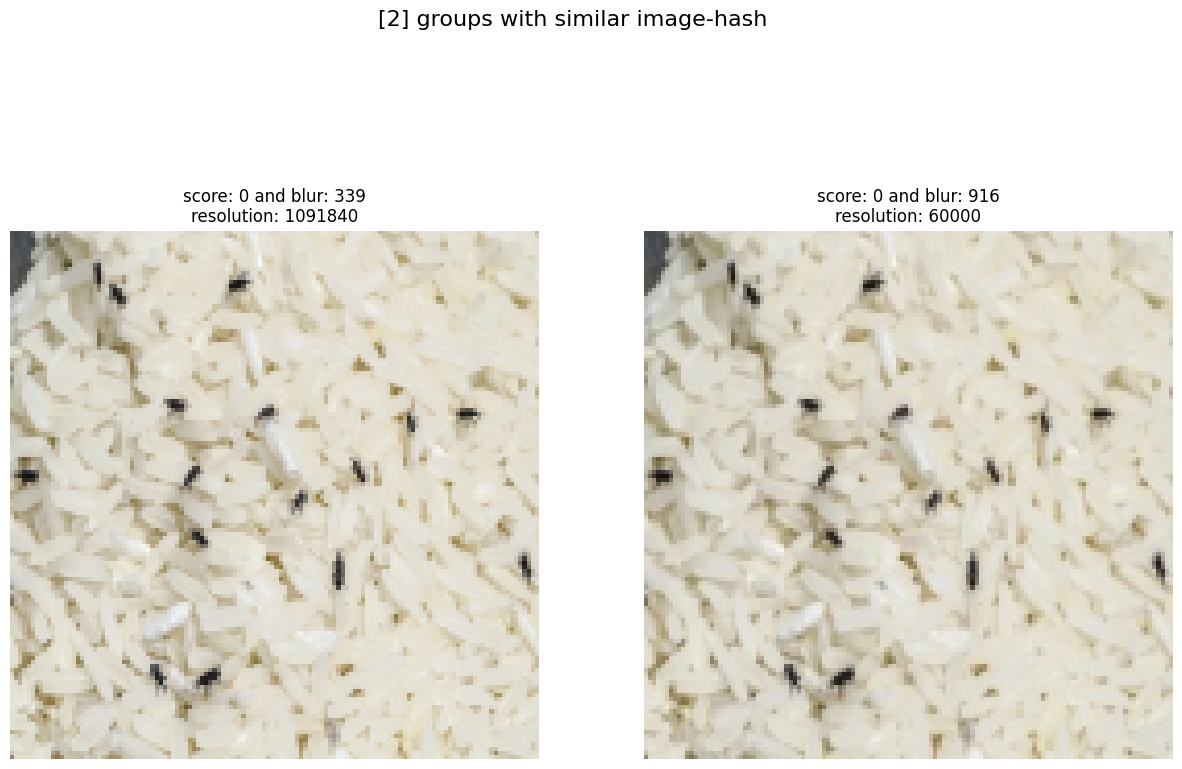

2it [00:00,  3.17it/s]

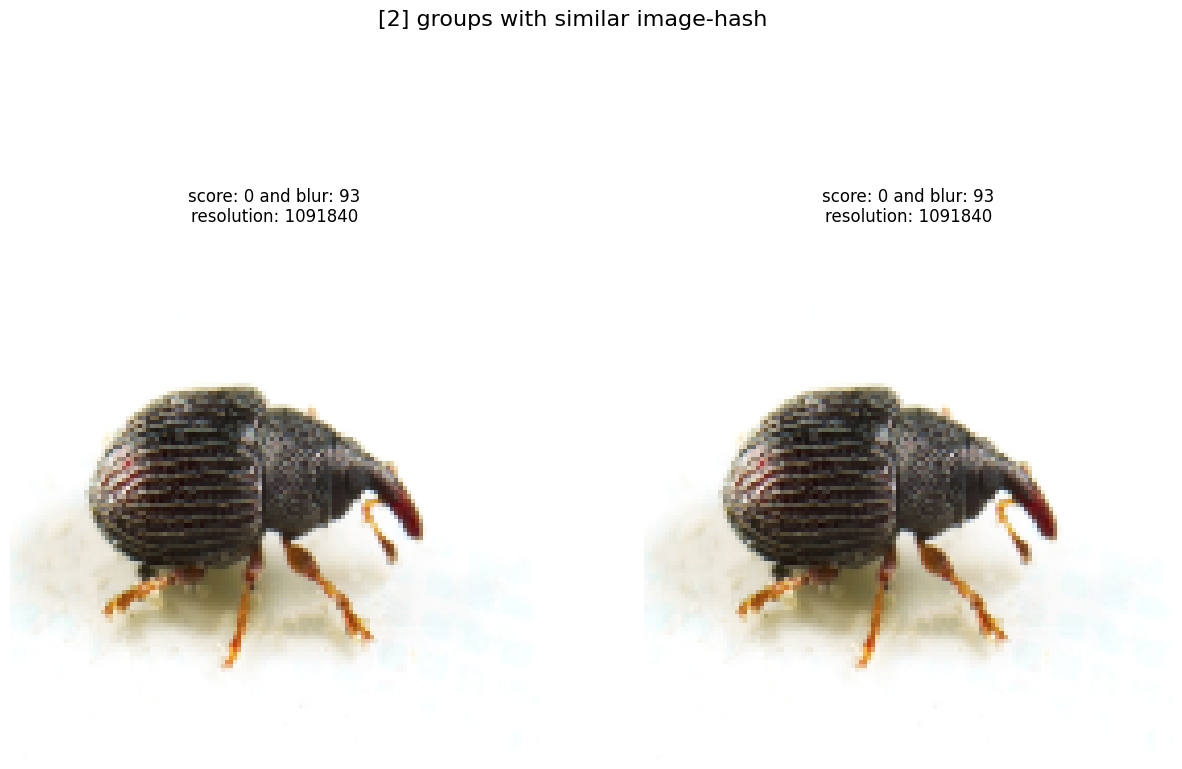

3it [00:00,  3.26it/s]

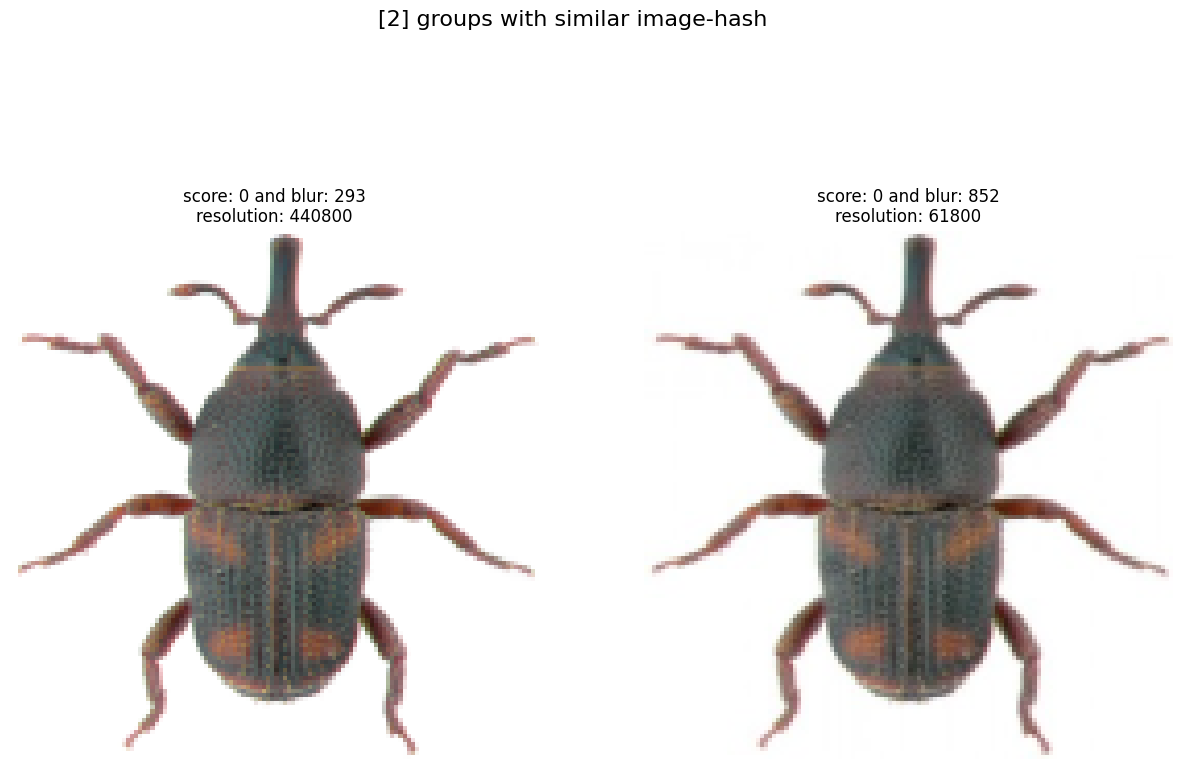

4it [00:01,  3.53it/s]

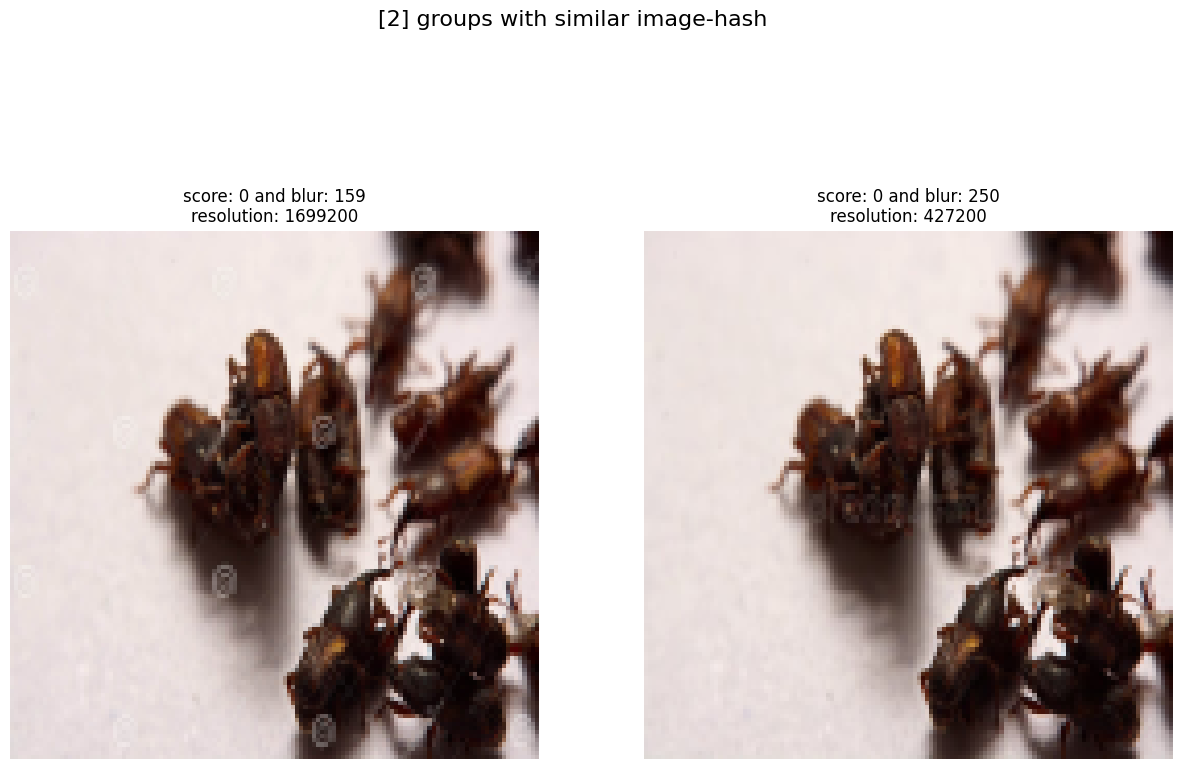

5it [00:01,  3.46it/s]

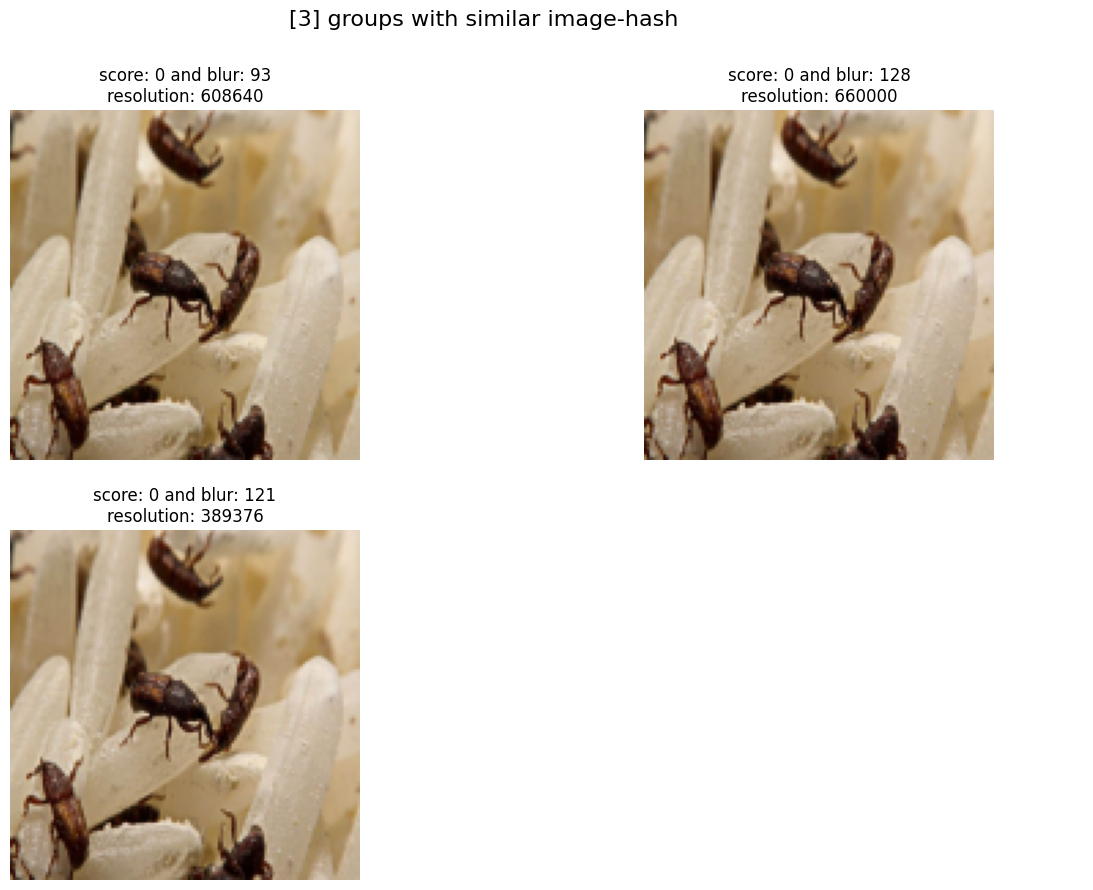

6it [00:01,  2.80it/s]

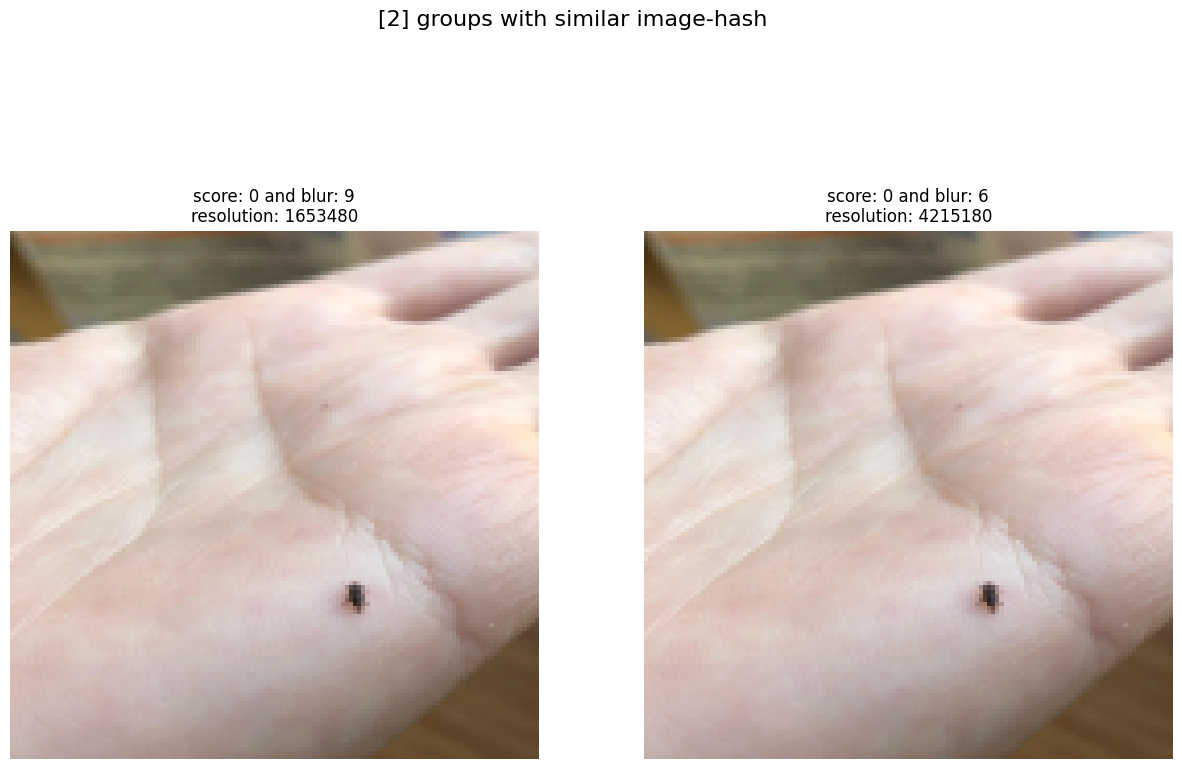

7it [00:02,  2.53it/s]

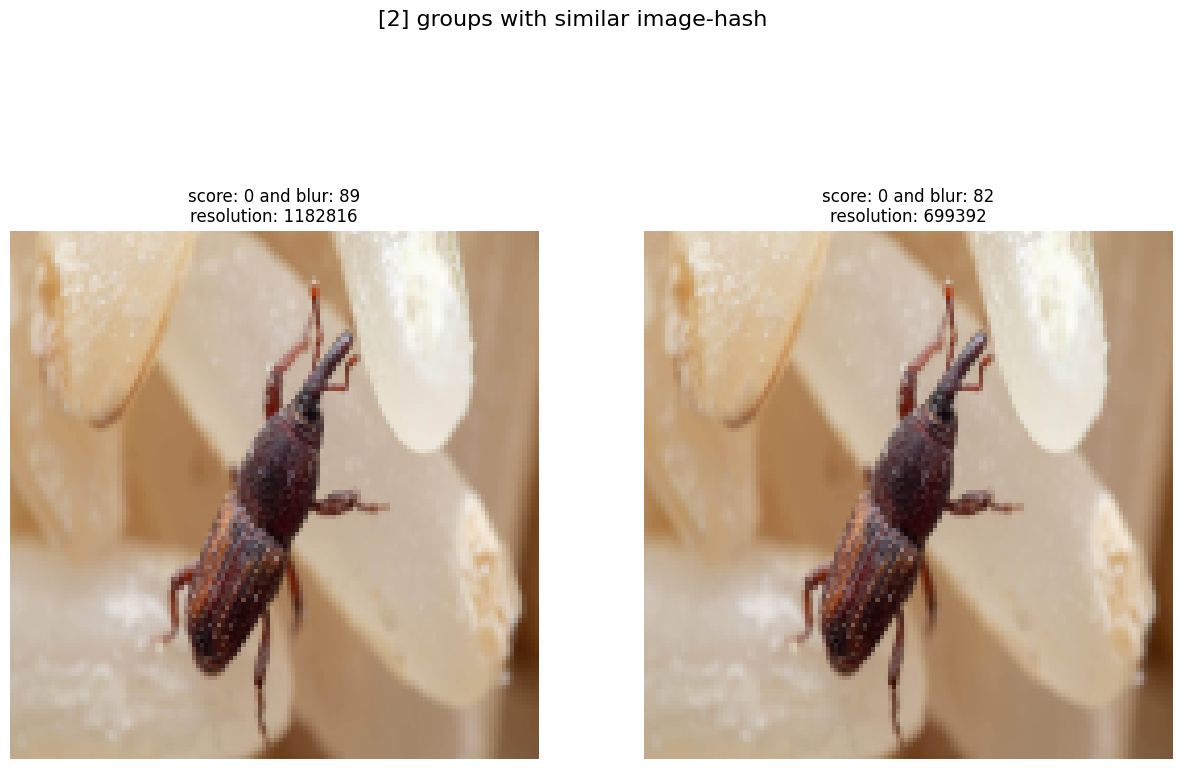

8it [00:02,  2.92it/s]

Group [ 12 144]:
- DATA/adult_rice_weevil/image_58_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_7_adult rice weevil.jpg
Group [17 29]:
- DATA/adult_rice_weevil/image_12_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_82_adult rice weevil.jpg
Group [ 27 139]:
- DATA/adult_rice_weevil/image_22_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_123_adult rice weevil.jpg
Group [ 32 121]:
- DATA/adult_rice_weevil/image_76_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_83_adult rice weevil.jpg
Group [ 49 117]:
- DATA/adult_rice_weevil/image_54_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_101_adult rice weevil.jpg
Group [ 60  79 173]:
- DATA/adult_rice_weevil/image_84_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_72_adult rice weevil.jpg
- DATA/adult_rice_weevil/image_105_adult rice weevil.jpg
Group [ 98 112]:
- DATA/adult_rice_weevil/goog_weevil_43.jpg
- DATA/adult_rice_weevil/goog_weevil_9.jpg
Group [175 176]:
- DATA/adult_rice_weevil/image_69_adult rice 

In [1]:
from undouble import Undouble
import os

# Directory constants
RAW_IMG_DIR = "DATA/"

# Undouble reference: https://erdogant.github.io/undouble/pages/html/input_output.html
# Init undouble with default settings
model = Undouble()

# Import data
model.import_data(RAW_IMG_DIR)

# Compute hashes
model.compute_hash()

# Find images with image-hash <= threshold
model.group(threshold=0)

# Plot duplicated images
model.plot()

# Extract pathnames for each group
for idx_group in model.results['select_idx']:
    print(f"Group {idx_group}:")
    for idx in idx_group:
        print(f"- {model.results['pathnames'][idx]}")
print("Duplicate images processed.")

# Collect paths for duplicate and non duplicate images
duplicate_images = []
non_duplicate_images = []

# reference (line 119): https://github.com/erdogant/undouble/blob/main/undouble/examples.py
# Extract pathnames for each group and classify them
for idx_group in model.results['select_idx']:
    if len(idx_group) == 1:       # Non duplicate (group size 1)
        non_duplicate_images.append(model.results['pathnames'][idx_group[0]])
    else:                         # Duplicate (group size > 1)
        for idx in idx_group:
            duplicate_images.append(model.results['pathnames'][idx])

# Remove duplicate images from folder
for img_path in duplicate_images:
    try:
        os.remove(img_path)  
        print(f"Removed duplicate image: {img_path}")
    except FileNotFoundError:
        print(f"File not found (could have already been moved): {img_path}")

